In [2]:
from karateclub import NetMF, Node2Vec, FeatherNode, AE

import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from copy import deepcopy

repo_path = str(Path.home()) + "/dev/GraphRouteOptimizationRL/"
graph_path = repo_path + \
    "datasets/osmnx/houston_tx_usa_drive_2000_slope.graphml"

output = repo_path + "datasets/embeddings/"

G = ox.load_graphml(graph_path)
G = nx.relabel.convert_node_labels_to_integers(G, first_label=0, ordering='default')

In [5]:
for e in G.edges(data=True):
    print(e)
    break

(0, 1109, {'osmid': [213212242, 103371588, 598794597], 'lanes': '4', 'name': 'West Dallas Street', 'highway': ['tertiary', 'secondary'], 'oneway': False, 'length': 81.889, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f6d7307ac10>, 'speed_kph': 48.3, 'travel_time': 6.1, 'grade': -0.02442, 'grade_abs': 0.02442, 'bearing': 269.8, 'direction': '6'})


In [6]:
for e in G.nodes(data=True):
    print(e)
    break

(0, {'y': 29.757765, 'x': -95.3743406, 'highway': 'traffic_signals', 'street_count': 4, 'elevation': 17.0, 'marsh': 'False'})


In [3]:
route = nx.shortest_path(G, source=0, target=899)

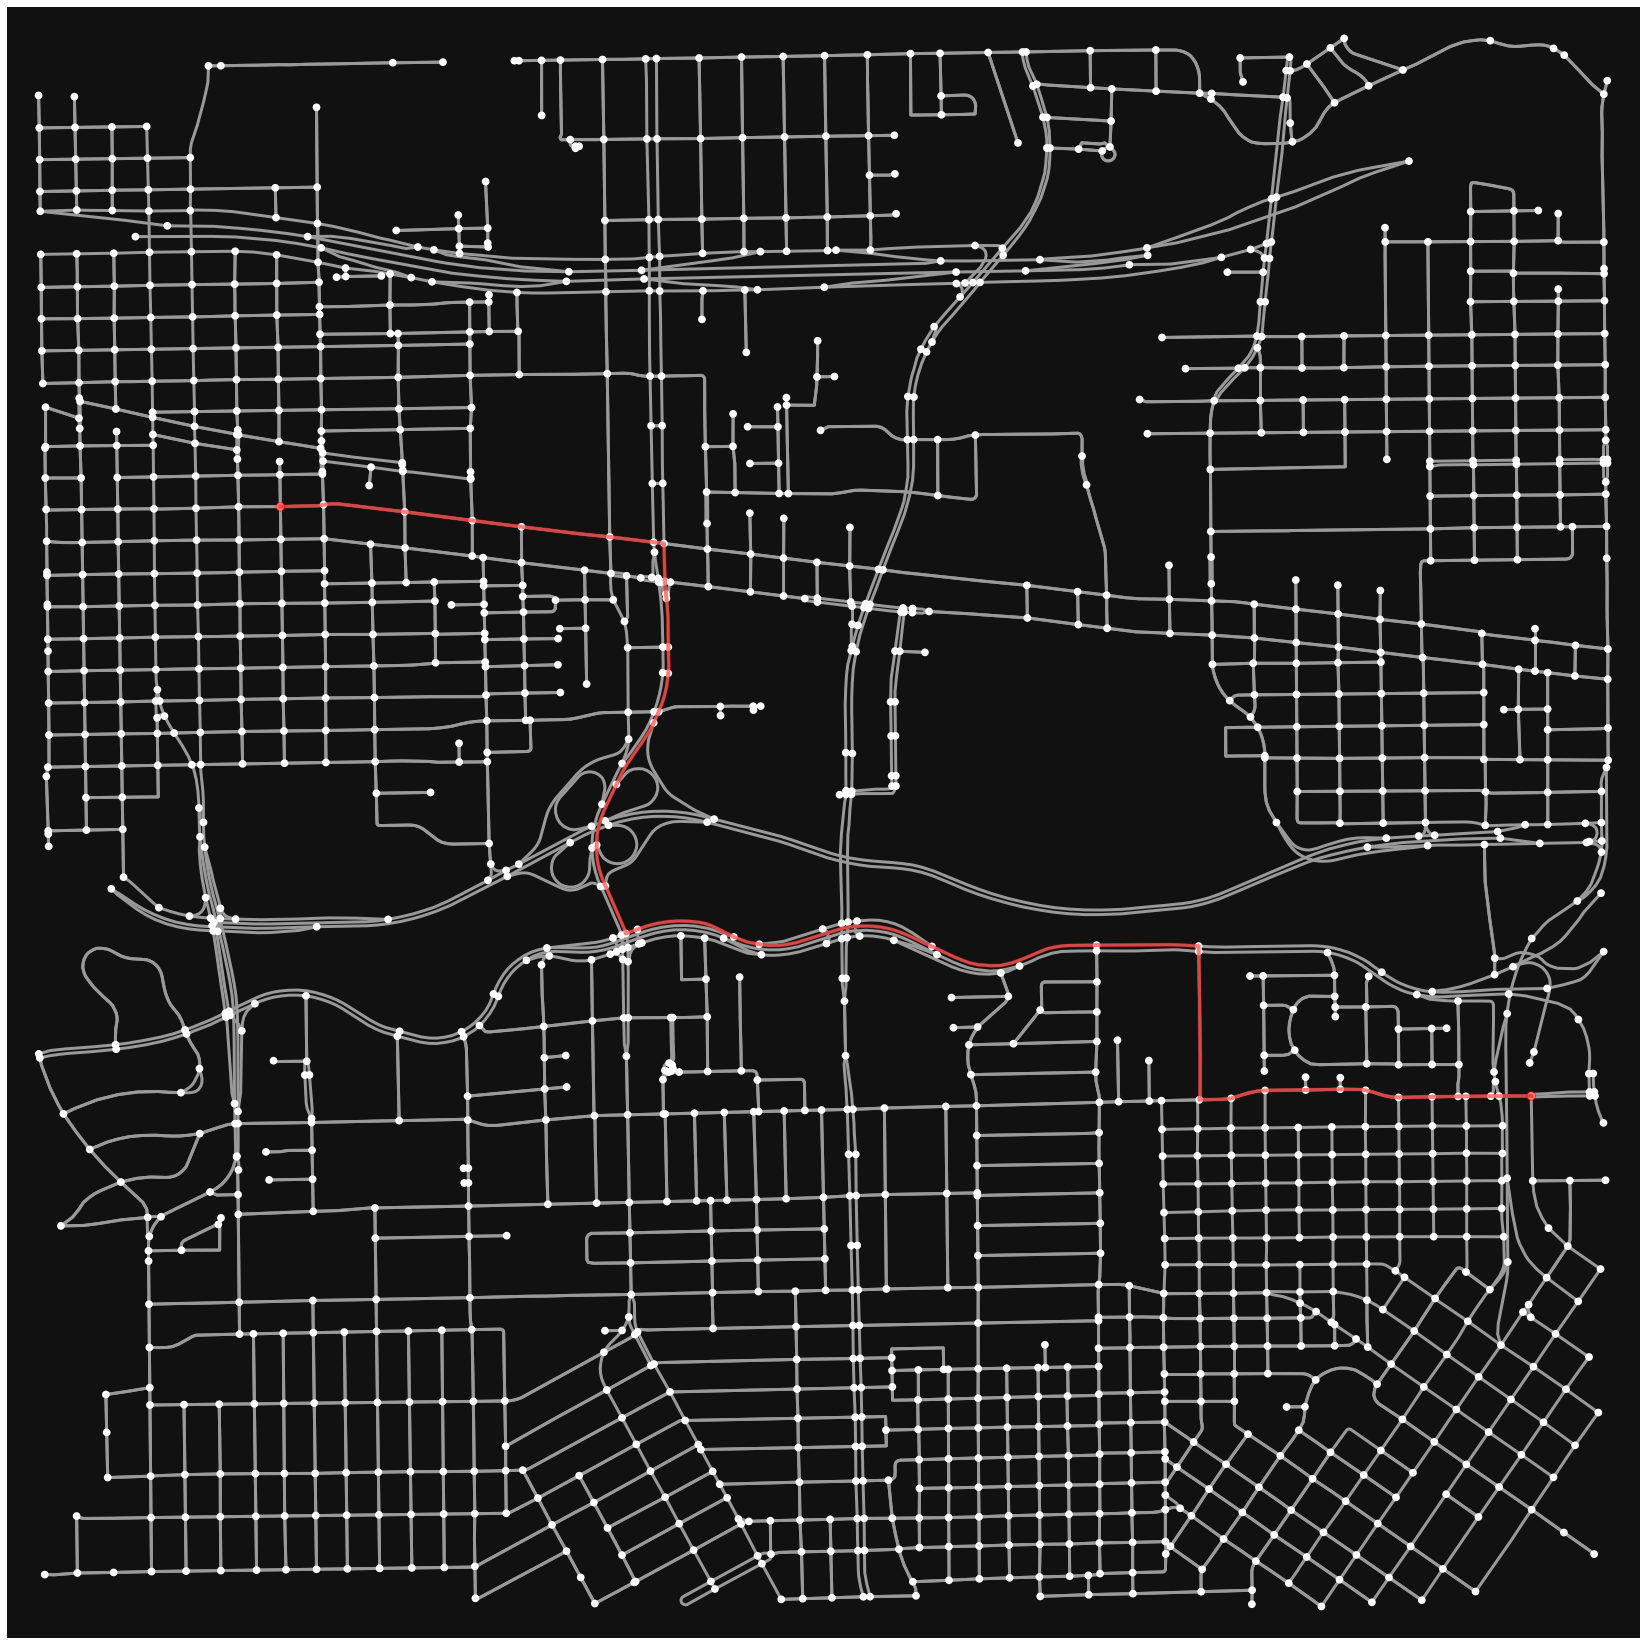

(<Figure size 2160x2160 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph_route(G, route, figsize=(30, 30), node_size=60, edge_linewidth=3)

In [8]:
from collections import deque
def get_observation(u, G, size=10, return_subgraph=False):
    dq = deque([u])
    visited = set()
    visited.add(u)

    while len(dq) != 0:
        v = dq.popleft()
        for i in G.neighbors(v):
            if i not in visited:
                dq.append(i)
                visited.add(i)
            if len(visited) == size + 1:
                # make sure the current not did not count in the size
                if return_subgraph:
                    H = G.subgraph(list(visited))
                    return H, visited
                else:
                    return visited
    raise Exception("Size too large")

In [9]:
obs = get_observation(212, G, size=4, return_subgraph=False)

In [6]:
route = nx.shortest_path(G, 201, 9084)

In [ ]:
ox.plot_graph_route(G, route, figsize=(30,30))

In [44]:
# model = Node2Vec(dimensions=32, workers=16)
model = NetMF()

print("Fitting")
model.fit(G)

print("Getting embedding")
X = model.get_embedding()

Fitting
Getting embedding


In [ ]:
# model = FeatherNode(reduction_dimensions=32)

print("Fitting")
model.fit(G, X)

print("Getting embedding")
X = model.get_embedding()

In [35]:
np.save(output + "houston_tx_usa_drive_2000_slope_netmf.npy", X)

In [39]:
embedding = np.load(output + "houston_tx_usa_drive_2000_slope_netmf.npy")

In [42]:
embedding.shape[1]

32